In [31]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# * y : 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
# Sampling rate: 1초당 샘플의 개수, 단위 1초당 Hz 또는 kHz
y , sr = librosa.load('../Data/music_data/genres_original/reggae/reggae.00036.wav')

In [32]:
print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr)) #음악의 길이(초) = 음파의 길이/Sampling rate

[0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]
661794
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


In [33]:
# 도대체 어떻게???
ipd.Audio(y, rate=sr) # y=음파, 이놈을 sr로 나누면 총 음악 길이

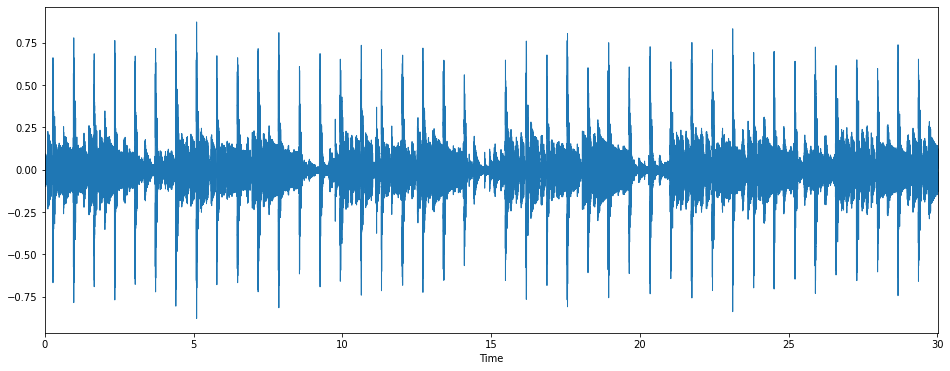

In [34]:
# 2D음파 그래프

plt.figure(figsize =(16,6))
librosa.display.waveplot(y=y,sr=sr)
plt.show()

(1025, 1293)


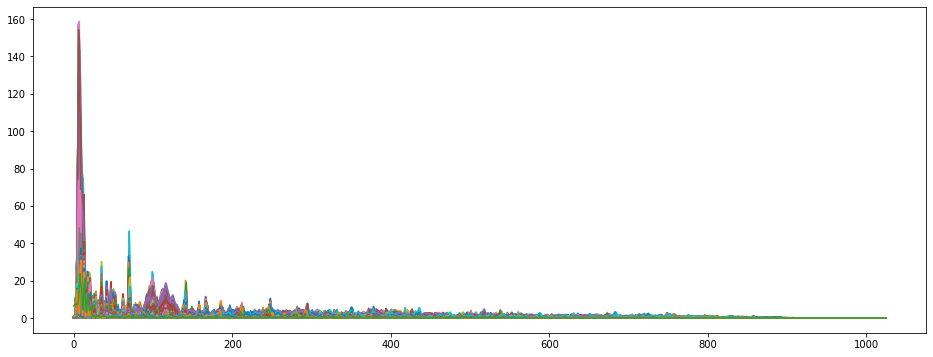

In [35]:
# 푸리에 변환
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 이 때, 음성의 길이를 얼마만큼으로 자를 것인가? 를 window라고 부른다.

print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

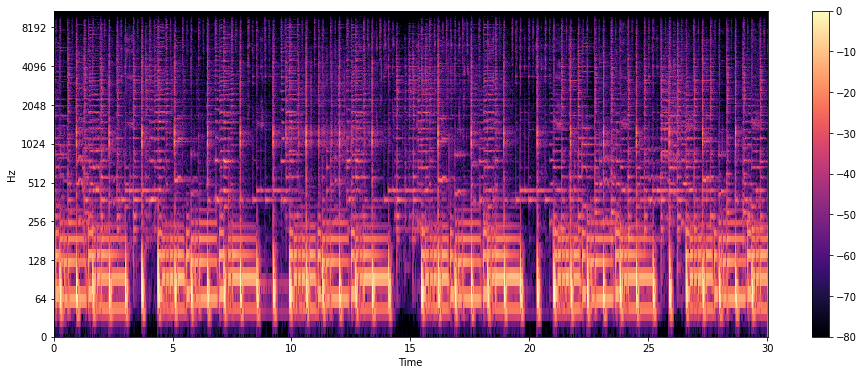

In [36]:
# Spectogram
DB = librosa.amplitude_to_db(D, ref=np.max) #amplitude(진폭) -> DB(데시벨)로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

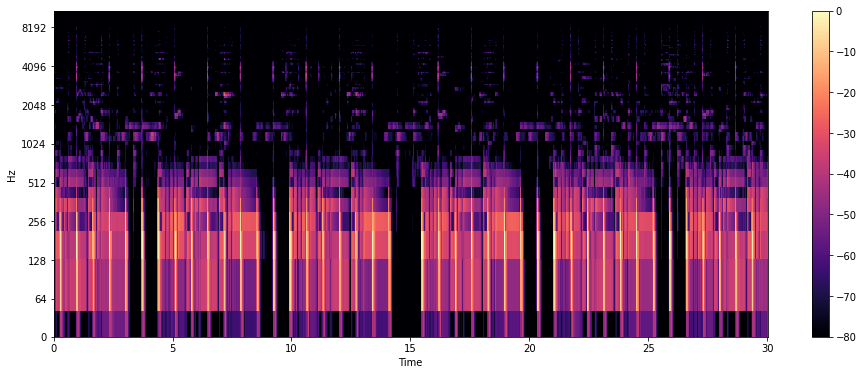

In [37]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

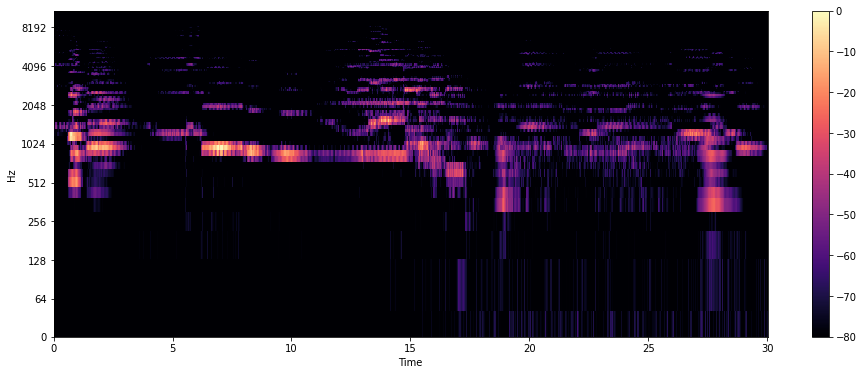

In [38]:
# 레게 vs 클래식 Mel Spectogram

y, sr = librosa.load('../Data/music_data/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

# 오디오 특성 추출(Audio Feature Extraction)